<a href="https://colab.research.google.com/github/Guisr98/PTC-Marketing-Bancario/blob/main/PTC_Marketing_Bancario.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PTC3567 - Ciência dos Dados em Automação e Engenharia (2022)**
##**Grupo 11:**

Guilherme Silva Rodrigues - 10289763

Vinicius Hideki Inomata - 10722112

###Tema: Marketing Bancário

  O dataset escolhido foi encontrado em um repositório de Machine Learning, hospedado no endereço https://archive.ics.uci.edu/ml/index.php
Os dados estão relacionados com uma campanha de telemarketing de uma instituição bancária portuguesa entre os anos 2008 a 2013. O objetivo é classificar se o cliente irá se inscrever numa oferta de depósito a prazo.


  Essa campanha de Marketing foi realizada por meio de chamadas telefonicas, nele há 21 variáveis, sendo 20 deles entrada e 1 a saída esperada (yes ou no) que indica se o cliente se inscreveu ou não no depósito a prazo.


In [ ]:
#Bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/PTC/bank-additional/bank-additional/bank-additional-full.csv') #lendo o arquivo

In [ ]:
data.head() #Dando uma olhada no dataset

,"age;""job"";""marital"";""education"";""default"";""housing"";""loan"";""contact"";""month"";""day_of_week"";""duration"";""campaign"";""pdays"";""previous"";""poutcome"";""emp.var.rate"";""cons.price.idx"";""cons.conf.idx"";""euribor3m"";""nr.employed"";""y"""
0,"56;""housemaid"";""married"";""basic.4y"";""no"";""no"";..."
1,"57;""services"";""married"";""high.school"";""unknown..."
2,"37;""services"";""married"";""high.school"";""no"";""ye..."
3,"40;""admin."";""married"";""basic.6y"";""no"";""no"";""no..."
4,"56;""services"";""married"";""high.school"";""no"";""no..."


In [ ]:
data.shape

(41188, 1)

Vendo o tamanho do dataset e sua preview é possivel verificar que algo está errado na leitura desses dados

In [ ]:
ndata = pd.read_csv('/content/drive/MyDrive/PTC/bank-additional/bank-additional/bank-additional-full.csv', sep = ";") #lendo o arquivo corretamente
ndata.head() #Dando uma olhada no novo dataset

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
#RODAR ESSA CELULA QUANDO TIVER FEITO O UPLOAD O ARQUIVO NO COLAB, CASO CONTRÁRIO RODE SOMENTE A CELULA ACIMA
ndata = pd.read_csv('/content/bank-additional-full.csv', sep = ";") #lendo o arquivo corretamente
ndata.head() #Dando uma olhada no novo dataset

FileNotFoundError: ignored

Agora que o dataset foi lido corretamente, iremos fazer uma Análise Exploratória dos Dados (EDA)

# **Análise Exploratória dos Dados (EDA)**

Tendo uma visão geral dos dados numéricos

In [ ]:
ndata.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


### Funções

In [ ]:
def countplot_withY(label, dataset):
  plt.figure(figsize=(20,10))
  Y = dataset[label]
  total = len(Y)*1.
  ax=sns.countplot(x=label, data=dataset, hue="y")
  for p in ax.patches:
    ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))

  ax.yaxis.set_ticks(np.linspace(0, total, 11))
  ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
  ax.legend(labels=["no","yes"])
  plt.show()

### Analisando as respostas dos clientes

no     36548
yes     4640
Name: y, dtype: int64


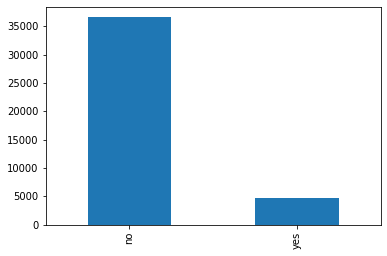

In [ ]:
y = ndata['y'].value_counts() #Contando a quantidade de yes e no para a proposta de um depósito a prazo
print(y)
y.plot.bar() #Plotando as respostas em gráfico de barra

Como pode ser visto acima, a respostas "não" são significamente maior que as respostas "sim", cerca de 8 vezes maior.

## Análise Numérica

### Analisando as idades dos clientes

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


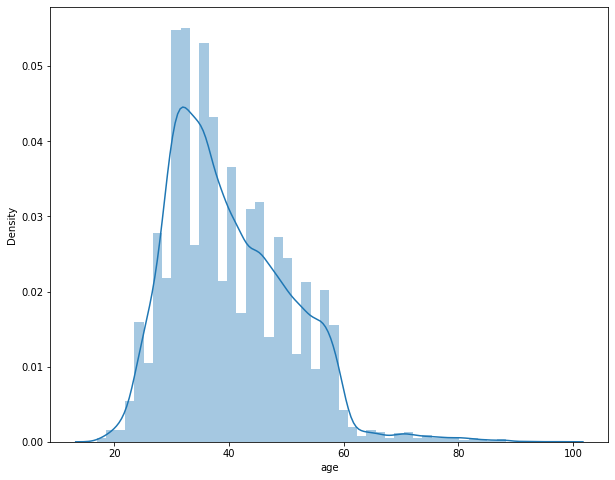

In [ ]:
plt.figure(figsize = (10,8)) #definindo tamanho da imagem
sns.distplot(ndata['age'])

31    1947
32    1846
33    1833
36    1780
35    1759
      ... 
89       2
91       2
94       1
87       1
95       1
Name: age, Length: 78, dtype: int64


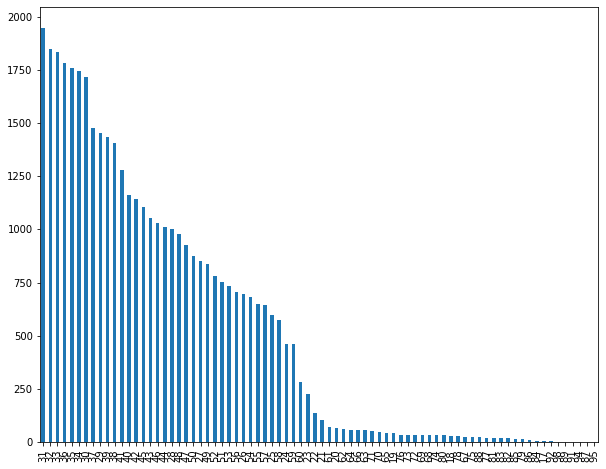

In [ ]:
age = ndata['age'].value_counts() # contando os valores da coluna
print(age)
plt.figure(figsize = (10,8)) #definindo tamanho da imagem
age.plot.bar()

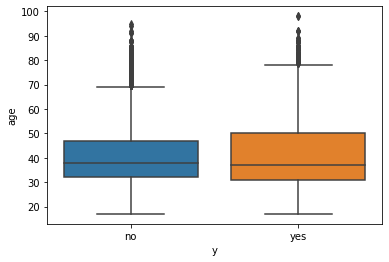

In [ ]:
sns.boxplot(data=ndata, x='y', y='age')

A maioria dos clites possuem idade entre 30 e 50 anos, mas esta variavel não é um bom indicador de qual cliente irá aceitar o depósito a prazo, uma vez que os gráficos se sobrepõem.

### Analisando a duração da chamada de telefone

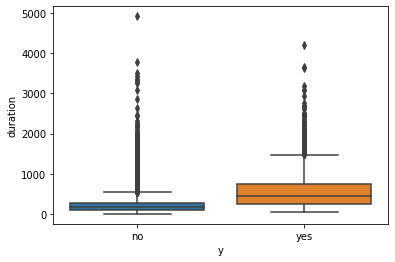

In [ ]:
sns.boxplot(data=ndata, x='y', y='duration')

Percebe-se que quando a duração da chamada dura mais que 400 segundos, é grande a probabilidade do cliente aceitar o deposito a prazo, o que certamente faz sentido, pois é um indicativo que ele está interessado. Entretanto, essa variável não será usado para a predição, visto que o valor dela só é determinada após o contato, ou seja, não saberemos seu valor na predição que, normalmente, acontece antes do contato.

### Analisando o número de contatos realizados durante essa campanha para o mesmo cliente

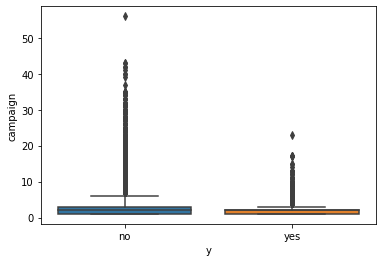

In [ ]:
sns.boxplot(data=ndata, x='y', y='campaign')

### Analisando o número de contatos realizados em campanhas anteriores para o mesmo cliente

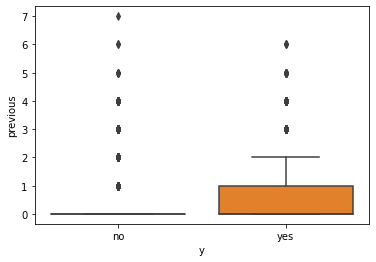

In [ ]:
sns.boxplot(data=ndata, x='y', y='previous')

### Analisando o numero de dias apos o ultimo contato feito em outra campanha

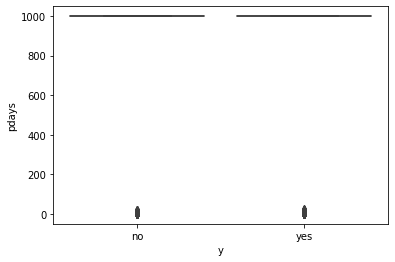

In [ ]:
sns.boxplot(data=ndata, x='y', y='pdays')

### Análise do Employment variation rate

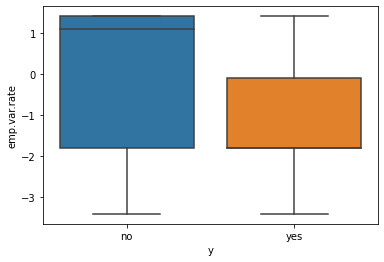

In [ ]:
sns.boxplot(data=ndata, x='y', y='emp.var.rate')

 1.4    16234
-1.8     9184
 1.1     7763
-0.1     3683
-2.9     1663
-3.4     1071
-1.7      773
-1.1      635
-3.0      172
-0.2       10
Name: emp.var.rate, dtype: int64


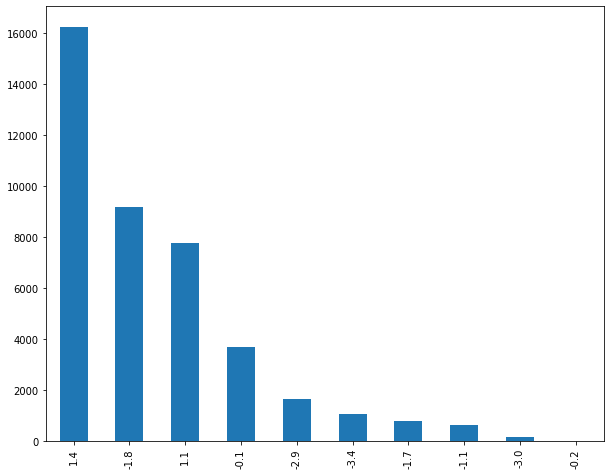

In [ ]:
emp = ndata['emp.var.rate'].value_counts() # contando os valores da coluna
print(emp)
plt.figure(figsize = (10,8)) #definindo tamanho da imagem
emp.plot.bar()

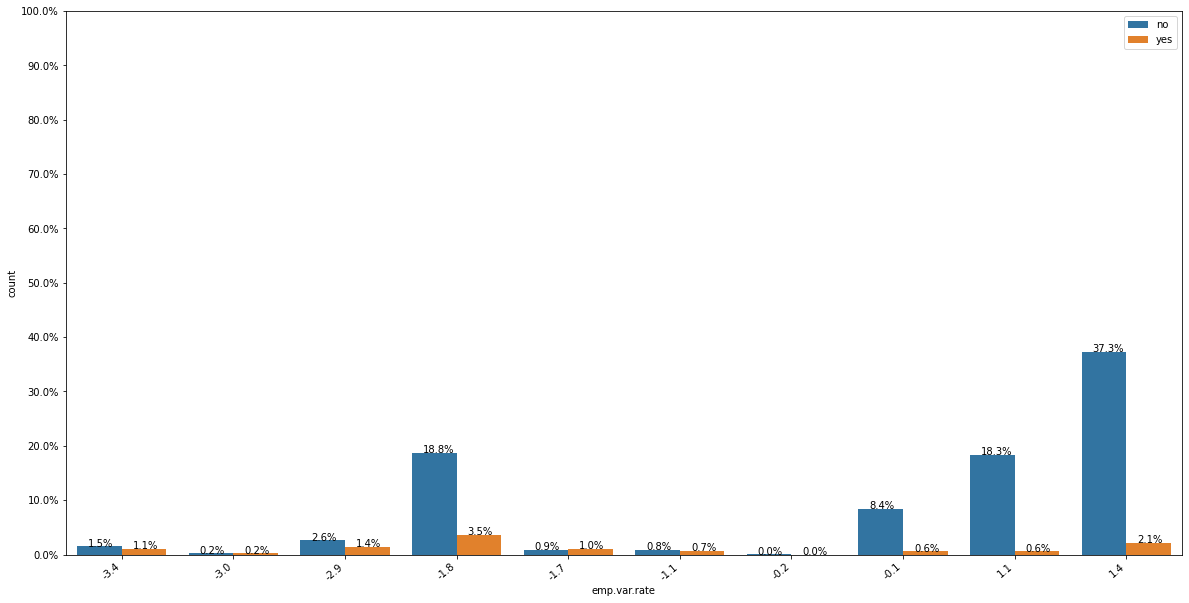

In [ ]:
countplot_withY('emp.var.rate', ndata)

valor positivo = alta variação no emprego, ou seja, instavel

negativo = estavel, mais provavel de aceitar a oferta de deposito a prazo

### Análise do Consumer price index

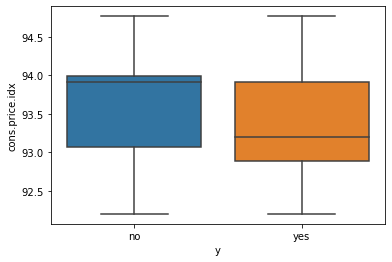

In [ ]:
sns.boxplot(data=ndata, x='y', y='cons.price.idx')

### Análise do Consumer confidence index

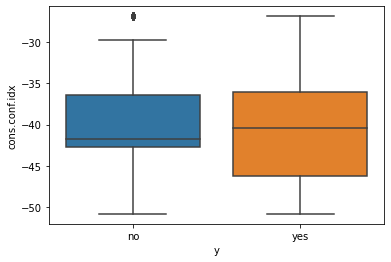

In [ ]:
sns.boxplot(data=ndata, x='y', y='cons.conf.idx')

measures how optimistic or pessimistic consumers are regarding their expected financial situation

### Análise do euribor3m

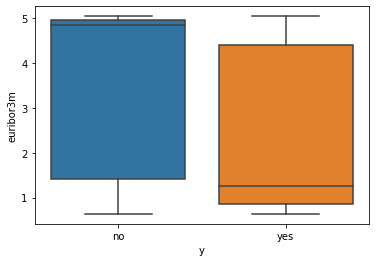

In [ ]:
sns.boxplot(data=ndata, x='y', y='euribor3m')

### Analise do Number of employees in the bank

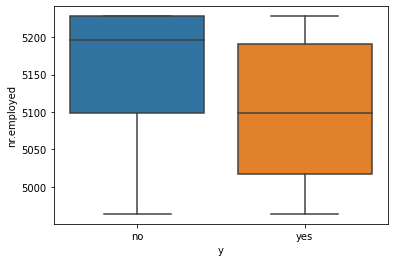

In [ ]:
sns.boxplot(data=ndata, x='y', y='nr.employed')

5228.1    16234
5099.1     8534
5191.0     7763
5195.8     3683
5076.2     1663
5017.5     1071
4991.6      773
5008.7      650
4963.6      635
5023.5      172
5176.3       10
Name: nr.employed, dtype: int64


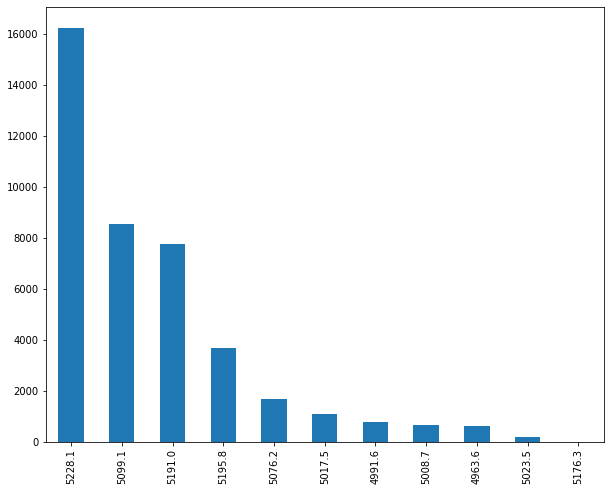

In [ ]:
nr = ndata['nr.employed'].value_counts() # contando os valores da coluna
print(nr)
plt.figure(figsize = (10,8)) #definindo tamanho da imagem
nr.plot.bar()

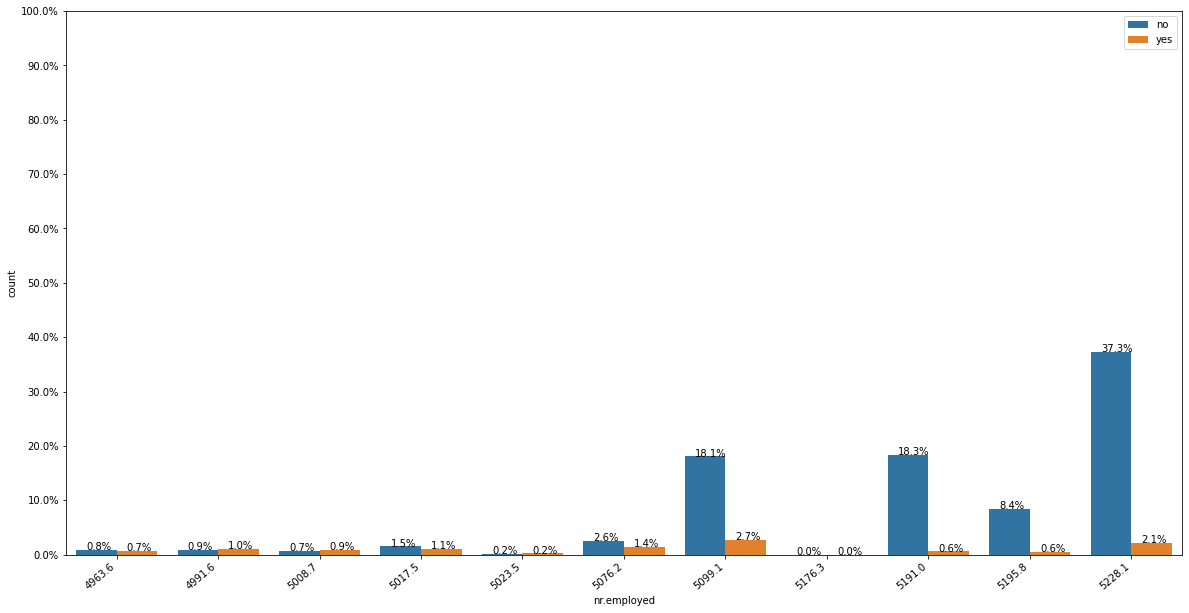

In [ ]:
countplot_withY('nr.employed', ndata)

## Análise Qualitativa

### Analisando os trabalhos dos clientes

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64


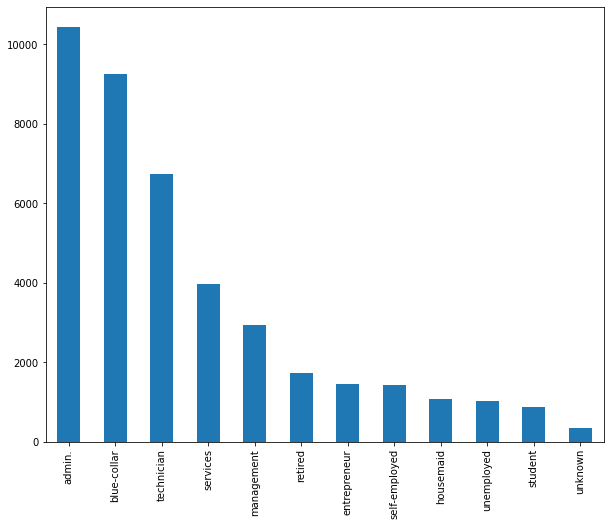

In [ ]:
job = ndata['job'].value_counts()
print(job)
plt.figure(figsize = (10,8)) #definindo tamanho da imagem
job.plot.bar()

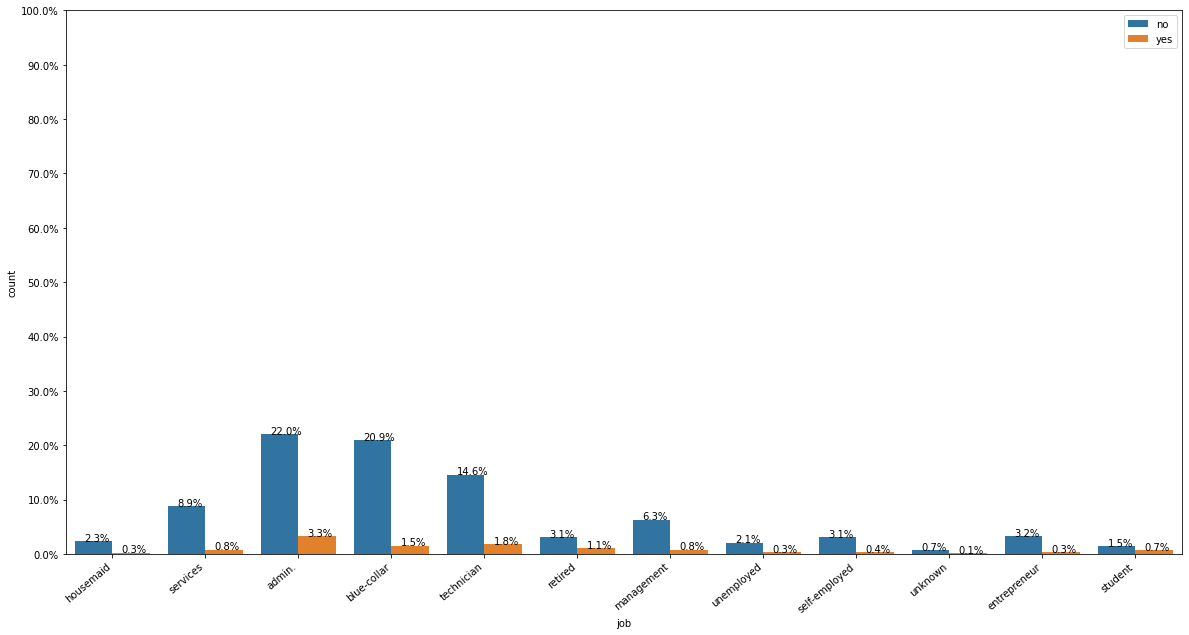

In [ ]:
countplot_withY('job', ndata)

É evidente que a maior parte dos clientes trabalha de admin e consequentemente, a maior parte dos yes's recebidos são desse emprego. Logo após encontram-se o blue-collar e technician que correspondem a terceira e segunda maior quantidade de yes's, respectivamente, o que logicamente faz sentido devido a maior quantidade de pessoas nesse ramo.

Em primeira análise, não há um insight muito claro sobre a influência do trabalho na determinação da variável de saída

### Analise do estado civil dos clientes

married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64


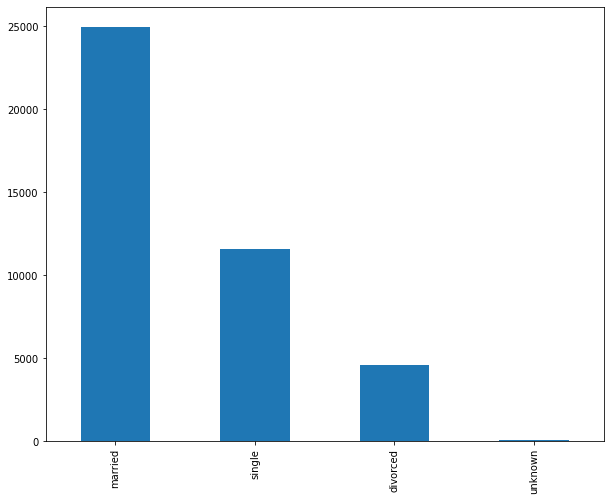

In [ ]:
marital = ndata['marital'].value_counts()
print(marital)
plt.figure(figsize = (10,8)) #definindo tamanho da imagem
marital.plot.bar()

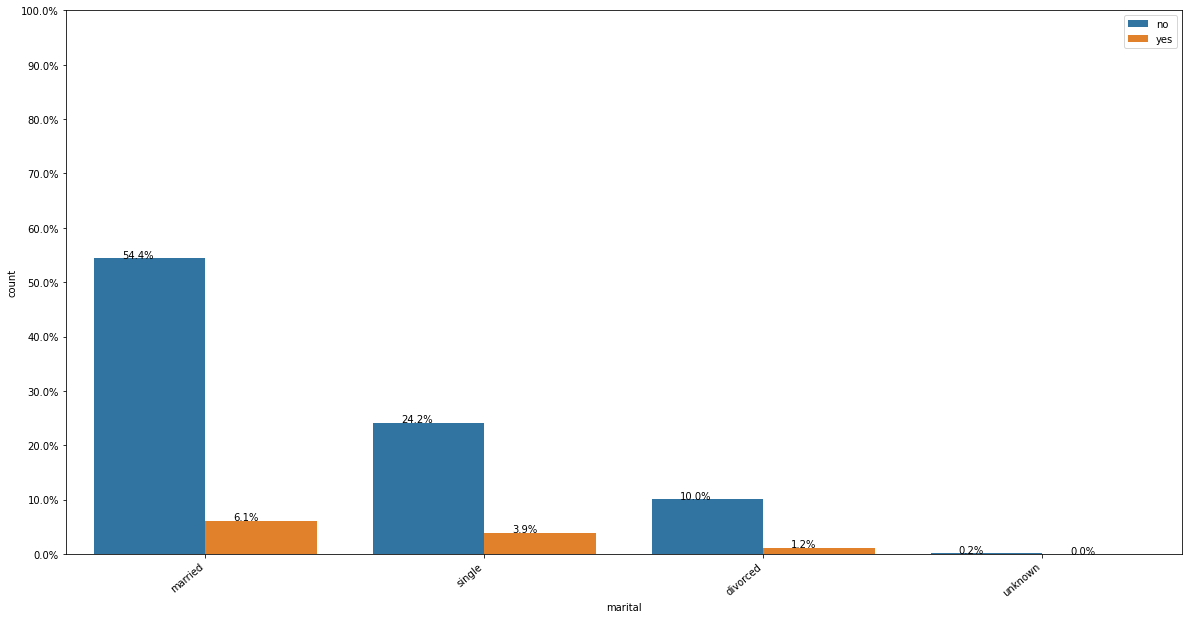

In [ ]:
countplot_withY('marital', ndata)

A maioria dos clientes são casados, seguido por solteiros e divorciados. A principio não há informações relevantes para a predição da saída

### Analise do nível de educação dos clientes

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64


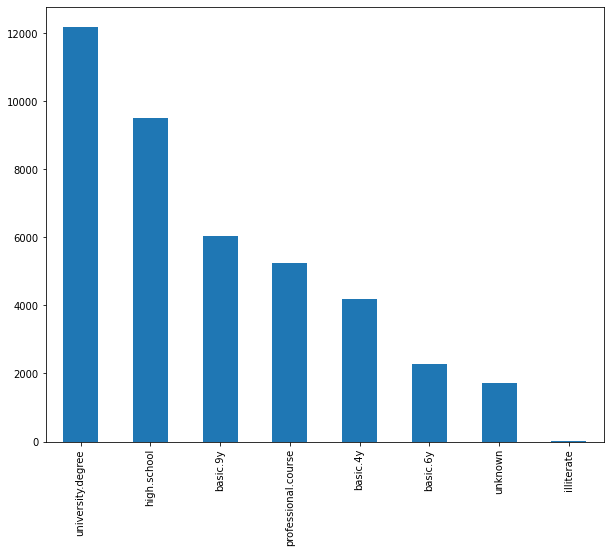

In [ ]:
education = ndata['education'].value_counts()
print(education)
plt.figure(figsize = (10,8)) #definindo tamanho da imagem
education.plot.bar()

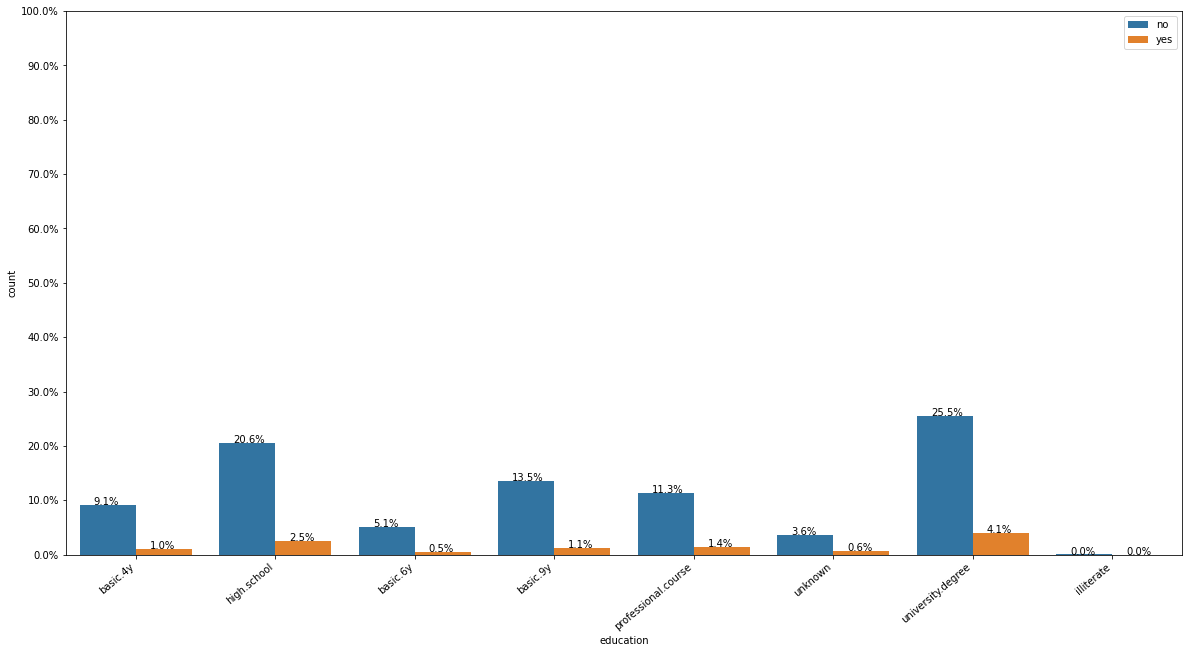

In [ ]:
countplot_withY('education', ndata)

### Analise do crédito inadimplente do cliente

no         32588
unknown     8597
yes            3
Name: default, dtype: int64


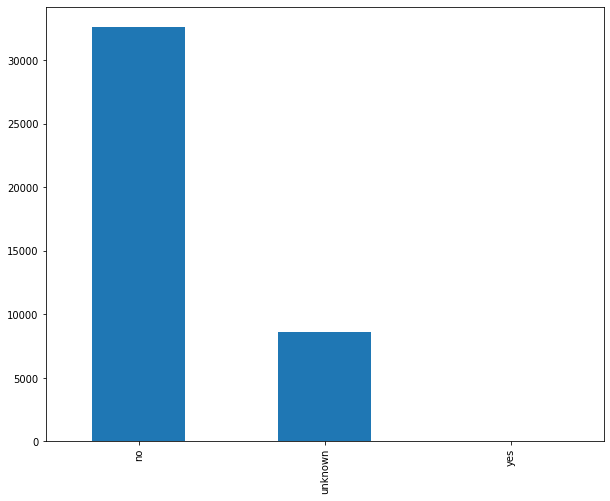

In [ ]:
education = ndata['default'].value_counts() # contando os valores da coluna
print(education)
plt.figure(figsize = (10,8)) #definindo tamanho da imagem
education.plot.bar()

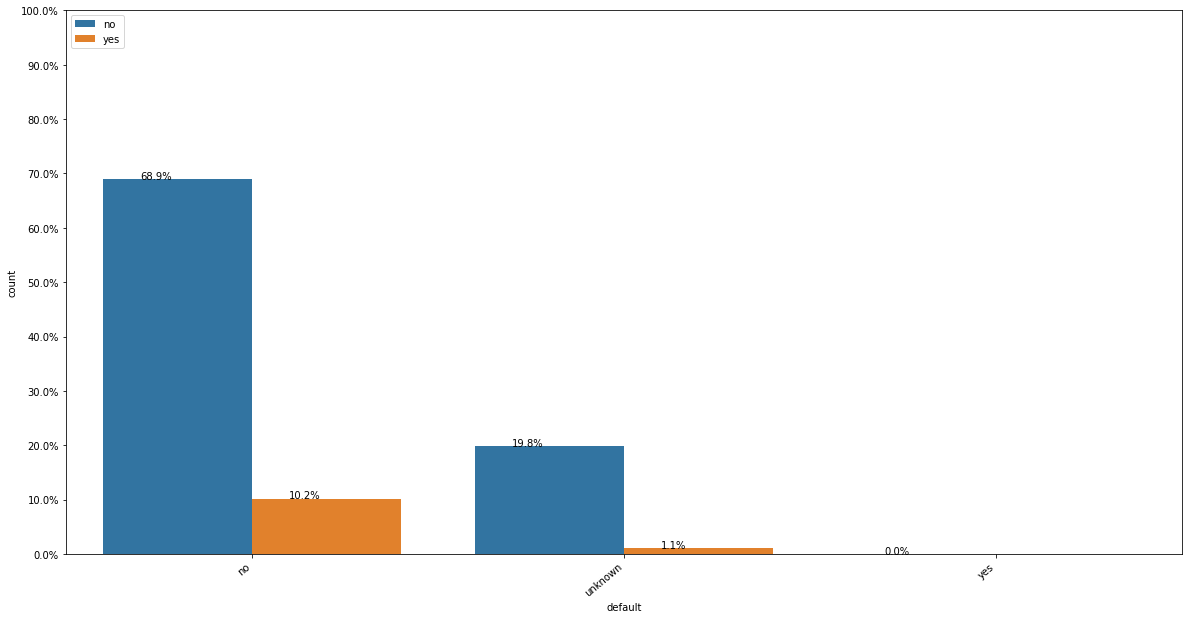

In [ ]:
countplot_withY('default', ndata)

### Analise da quantidade de clientes que possui empréstimo de moradia

yes        21576
no         18622
unknown      990
Name: housing, dtype: int64


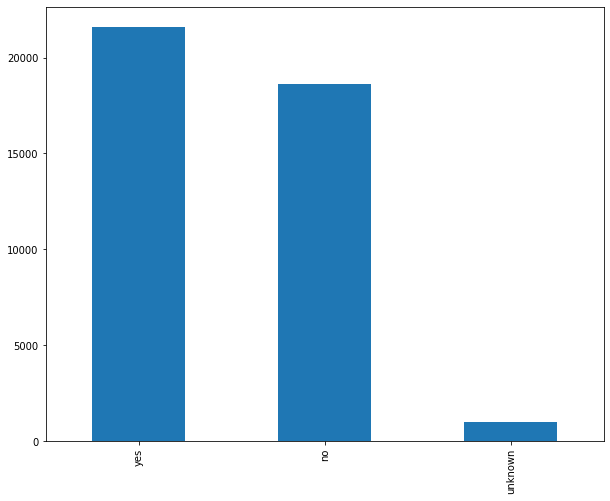

In [ ]:
education = ndata['housing'].value_counts()# contando os valores da coluna
print(education)
plt.figure(figsize = (10,8))# definindo tamanho da imagem
education.plot.bar()

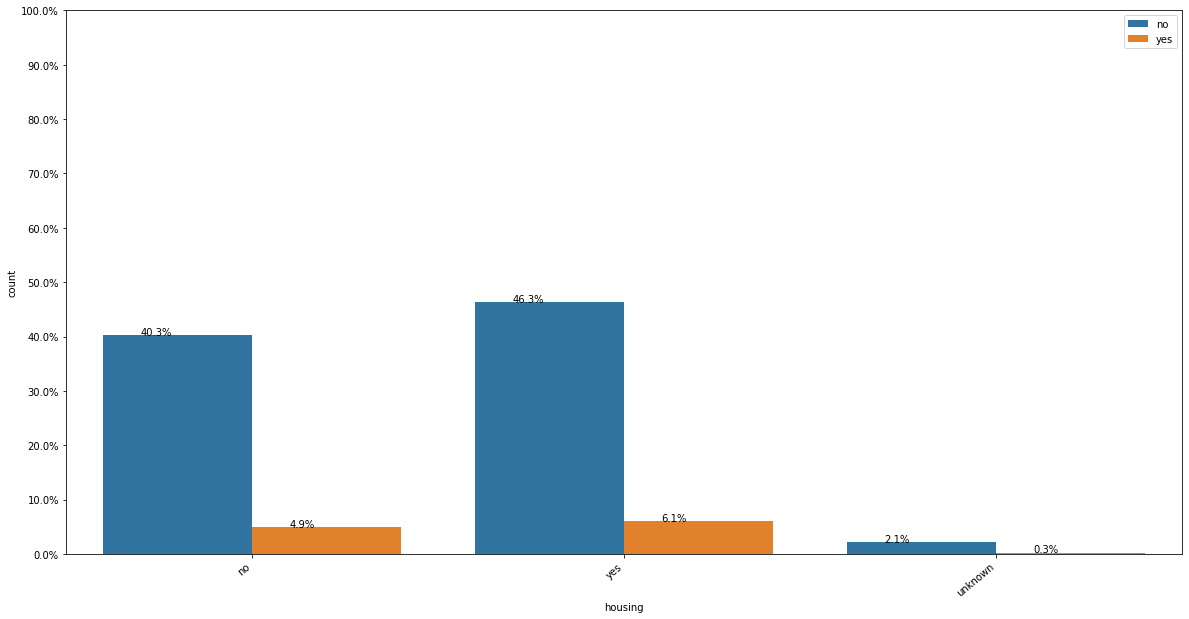

In [ ]:
countplot_withY('housing', ndata)

### Análise da quantidade de clientes que possui empréstimo

no         33950
yes         6248
unknown      990
Name: loan, dtype: int64


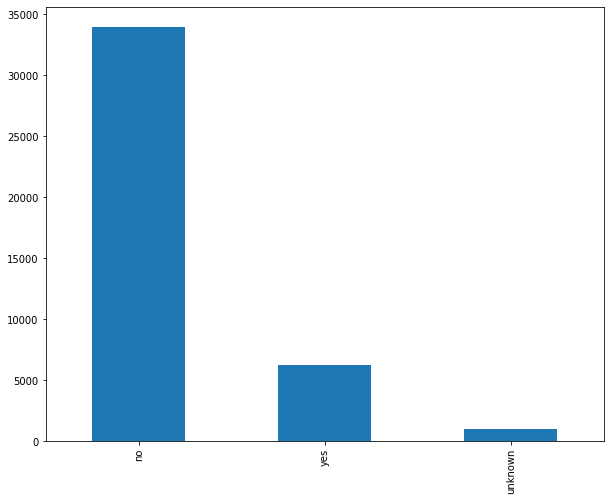

In [ ]:
education = ndata['loan'].value_counts()# contando os valores da coluna
print(education)
plt.figure(figsize = (10,8))# definindo tamanho da imagem
education.plot.bar()

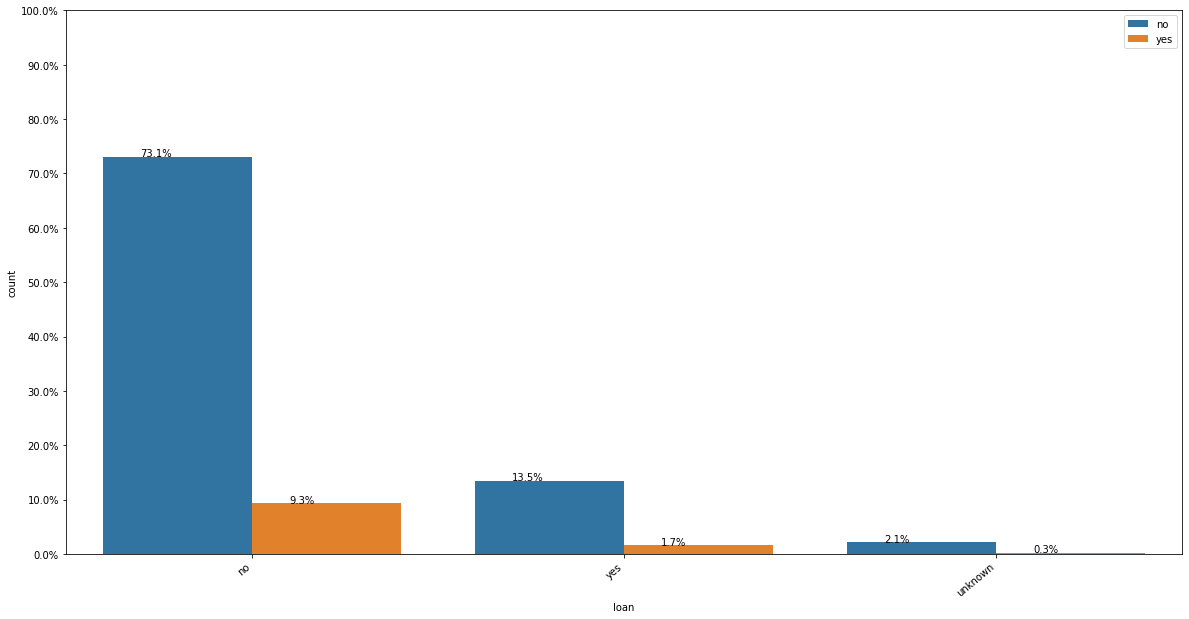

In [ ]:
countplot_withY('loan', ndata)

### Análise do tipo de comunicação utilizada

cellular     26144
telephone    15044
Name: contact, dtype: int64


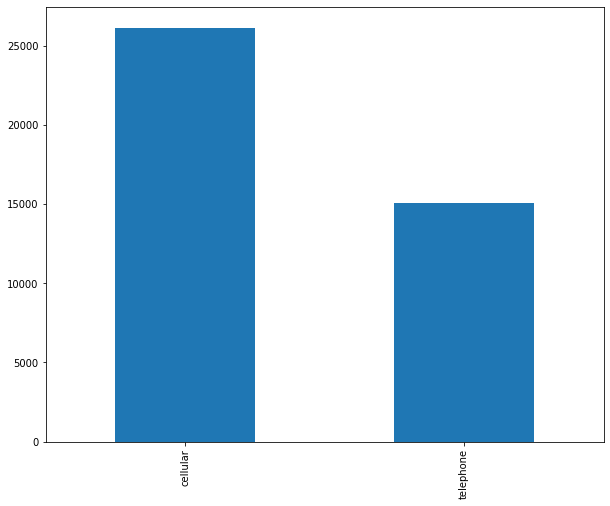

In [ ]:
education = ndata['contact'].value_counts()# contando os valores da coluna
print(education)
plt.figure(figsize = (10,8))# definindo tamanho da imagem
education.plot.bar()

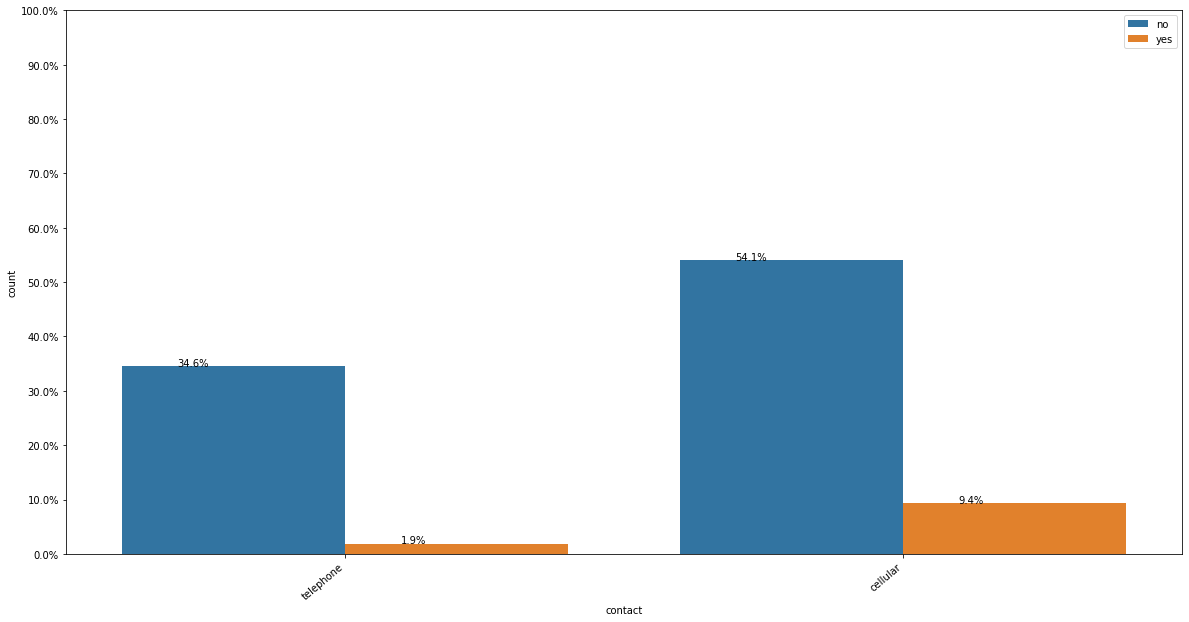

In [ ]:
countplot_withY('contact', ndata)

### Análise do dia da semana e mês do contato com o cliente

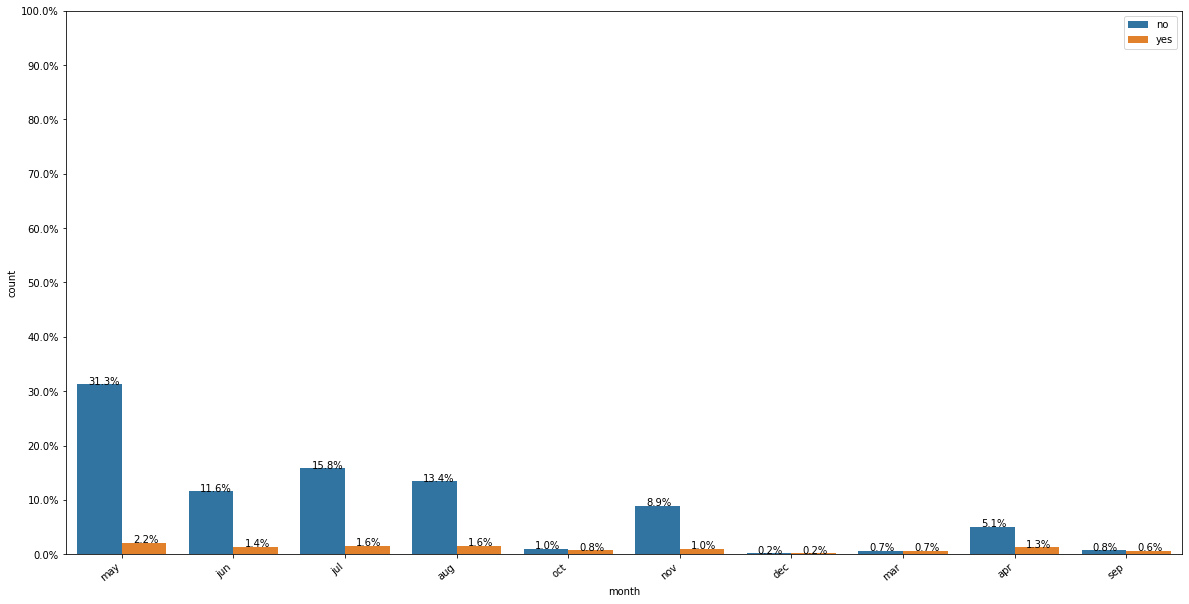

In [ ]:
countplot_withY('month', ndata)

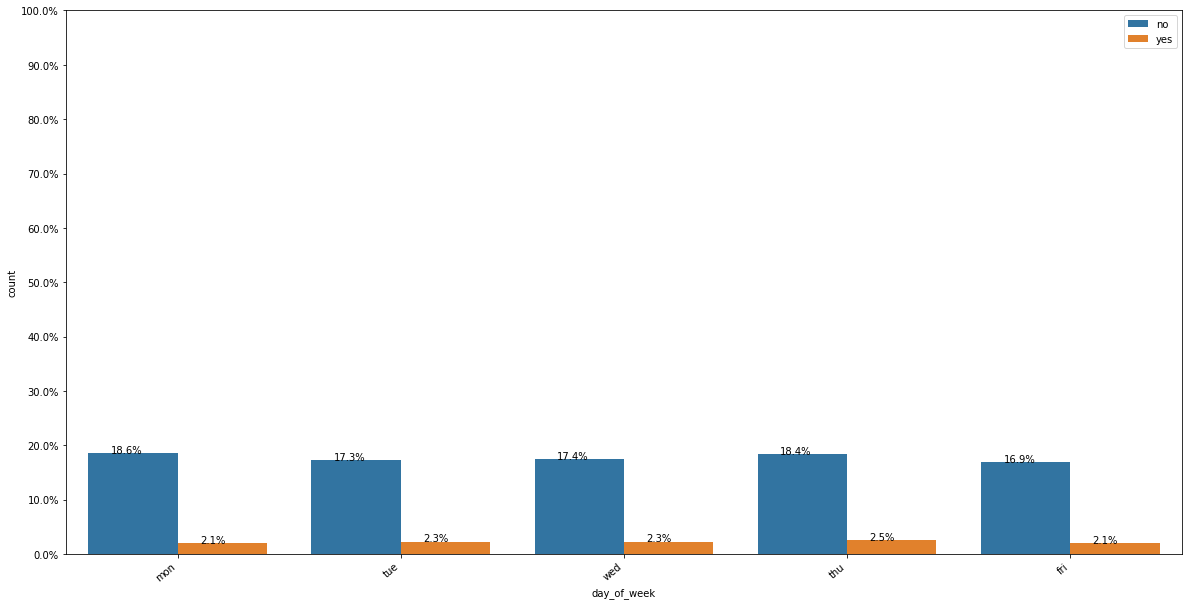

In [ ]:
countplot_withY('day_of_week', ndata)

### Resultado da campanha de marketing anterior

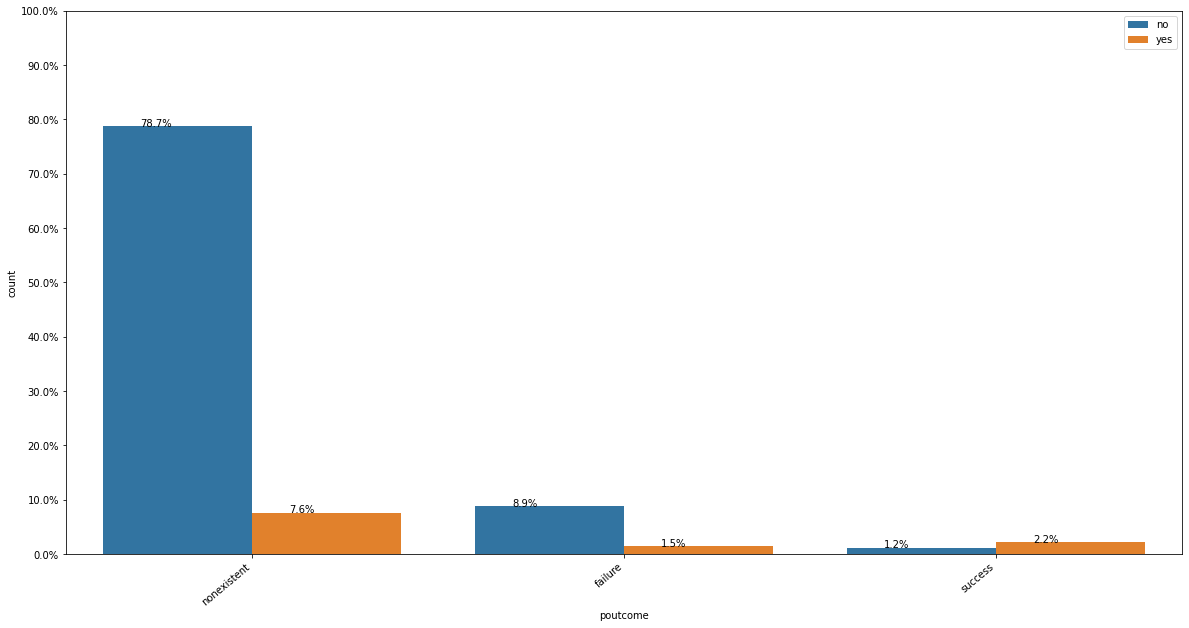

In [ ]:
countplot_withY('poutcome', ndata)

## Correlações

Text(0.5, 1.05, 'Correlação de Pearson')

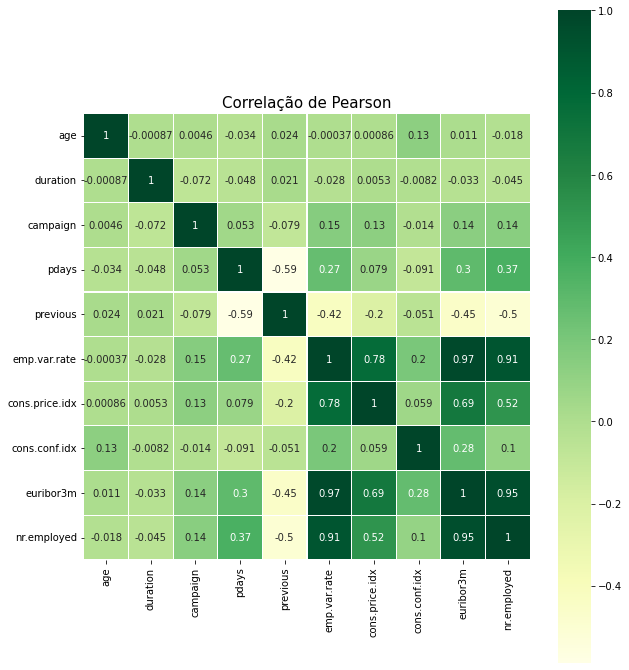

In [ ]:
corr = ndata.corr()

f, ax = plt.subplots(figsize=(10,12))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
_ = sns.heatmap(corr, cmap="YlGn", square=True, ax=ax, annot=True, linewidth=0.1)

plt.title("Correlação de Pearson", y=1.05, size=15)

# **Predição e Machine Learning**

## Retirando colunas duplicadas

In [ ]:
ndata = ndata.drop_duplicates()
ndata.shape

(41176, 21)

## Separando o dataset em grupos menores

A fim de ter um dataset de treino, validação cruzada e validação, separaremos o dataset inicial por meio da função train_test_split()

In [ ]:
ndata_x = ndata.iloc[:,:-1]
print("Tamanho de X:", ndata_x.shape)
ndata_y = ndata["y"]
print("Tamanho de Y:", ndata_y.shape)

Tamanho de X: (41176, 20)
Tamanho de Y: (41176,)


In [ ]:
from sklearn.model_selection import train_test_split

X_rest, X_test, y_rest, y_test = train_test_split(ndata_x, ndata_y, test_size = 0.2)
X_train, X_cv, y_train, y_cv = train_test_split(X_rest, y_rest, test_size = 0.2)

print("X Train:", X_train.shape)
print("X CV:", X_cv.shape)
print("X Test:", X_test.shape)
print("Y Train:", y_train.shape)
print("Y CV:", y_cv.shape)
print("Y Test:", y_test.shape)

X Train: (26352, 20)
X CV: (6588, 20)
X Test: (8236, 20)
Y Train: (26352,)
Y CV: (6588,)
Y Test: (8236,)


In [ ]:
y_train.replace({"no":0,"yes":1}, inplace=True)
y_cv.replace({"no":0,"yes":1}, inplace=True)
y_test.replace({"no":0,"yes":1}, inplace=True)

## Dividindo as variaveis qualitativas com o metodo "One hot Encoding"

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

def add_onehot_to_dataframe(sparse, df, vectorizer, name):

  for i, col in enumerate(vectorizer.get_feature_names()):
    colname = name+"_"+col
    df[colname] = sparse[:, i].toarray().ravel().tolist()

  return df

def OneHotEncoder(categorical_cols, X_train, X_test, X_cv=None, include_cv=False):

  for i in categorical_cols:
    Vectorizer = CountVectorizer(token_pattern="[A-Za-z0-9-.]+")
    print("Codificando: ", i)

    temp_cols = Vectorizer.fit_transform(X_train[i])
    X_train = add_onehot_to_dataframe(temp_cols, X_train, Vectorizer, i)


    if include_cv:
      temp_cols = Vectorizer.transform(X_cv[i])
      X_cv = add_onehot_to_dataframe(temp_cols, X_cv, Vectorizer, i)

    temp_cols = Vectorizer.transform(X_test[i])
    X_test = add_onehot_to_dataframe(temp_cols, X_test, Vectorizer, i)

In [ ]:
categorical_feature_mask = ndata_x.dtypes==object
categorical_cols = ndata_x.columns[categorical_feature_mask].tolist()

OneHotEncoder(categorical_cols, X_train, X_test, X_cv, True)

X_train = X_train.drop(categorical_cols, axis=1)
X_cv = X_cv.drop(categorical_cols, axis=1)
X_test = X_test.drop(categorical_cols, axis=1)

print("Tamanho de train: ", X_train.shape)
print("Tamanho de CV: ", X_cv.shape)
print("Tamanho de test: ", X_test.shape)

Codificando:  job


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Codificando:  marital
Codificando:  education
Codificando:  default
Codificando:  housing
Codificando:  loan
Codificando:  contact
Codificando:  month
Codificando:  day_of_week
Codificando:  poutcome
Tamanho de train:  (26352, 63)
Tamanho de CV:  (6588, 63)
Tamanho de test:  (8236, 63)


In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26352 entries, 33761 to 41143
Data columns (total 63 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            26352 non-null  int64  
 1   duration                       26352 non-null  int64  
 2   campaign                       26352 non-null  int64  
 3   pdays                          26352 non-null  int64  
 4   previous                       26352 non-null  int64  
 5   emp.var.rate                   26352 non-null  float64
 6   cons.price.idx                 26352 non-null  float64
 7   cons.conf.idx                  26352 non-null  float64
 8   euribor3m                      26352 non-null  float64
 9   nr.employed                    26352 non-null  float64
 10  job_admin.                     26352 non-null  int64  
 11  job_blue-collar                26352 non-null  int64  
 12  job_entrepreneur               26352 non-n

## Prevendo a Variavel de saída

### Com a Coluna de Duração

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(class_weight='balanced')
model.fit(X_train, y_train)
y_pred = model.predict_proba(X_test)

print("AUC score com a coluna de Duração: ", roc_auc_score(y_test, y_pred[:,1]))

AUC score com a coluna de Duração:  0.9326852259702368


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Como pode ser visto acima, com a coluna de duração, a predição do algoritmo é de cerca de 93% de acerto, o que certamente é um valor consideravelmente alto. Entretanto, como foi dito anteriormente, o valor da duração só é sabivel após o contato, não antes do contato, assim iremos retirar essa coluna e ver o impacto disso na nossa predição.

### Sem a Coluna de Duração

In [ ]:
# Removing duration feature

# From Train
X_trainsem = X_train.drop("duration", axis=1)
print("O formato do train dataset: ", X_train.shape)

# From CV
X_cvsem = X_cv.drop("duration", axis=1)
print("O formato do cv dataset: ", X_cv.shape)

# From Test
X_testsem = X_test.drop("duration", axis=1)
print("O formato do test dataset: ", X_test.shape)


O formato do train dataset:  (26352, 63)
O formato do cv dataset:  (6588, 63)
O formato do test dataset:  (8236, 63)


In [ ]:
model = LogisticRegression(class_weight='balanced')
model.fit(X_trainsem, y_train)
y_predsem = model.predict_proba(X_testsem)

print("AUC score sem a coluna de Duração: ", roc_auc_score(y_test, y_predsem[:,1]))

NameError: ignored

Certamente é visível o impacto que essa coluna tem na nossa predição. Um acerto de 93% caiu para 77% por causa dessa única coluna

AUC for k =  1e-05 is 0.7634129688758915
AUC for k =  0.0001 is 0.7696435200381964
AUC for k =  0.001 is 0.7877810868073171
AUC for k =  0.01 is 0.7961296290770195
AUC for k =  0.1 is 0.7953258333084658
AUC for k =  1 is 0.795757930231864
AUC for k =  10 is 0.7960374802303721
AUC for k =  100 is 0.7930581600071618
AUC for k =  1000 is 0.7970592342812808


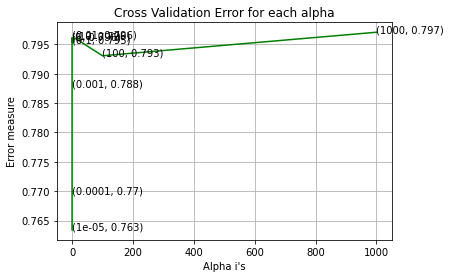

In [ ]:
%matplotlib inline
from sklearn.calibration import CalibratedClassifierCV

alpha = [10 ** x for x in range(-5, 4)]
cv_auc_array=[]
for i in alpha:
    logisticR=LogisticRegression(penalty='l2',C=i,class_weight='balanced', solver='lbfgs', max_iter=5000)
    logisticR.fit(X_trainsem,y_train)
    sig_clf = CalibratedClassifierCV(logisticR, method="sigmoid")
    sig_clf.fit(X_trainsem, y_train)
    predict_y = sig_clf.predict_proba(X_cvsem)
    cv_auc_array.append(roc_auc_score(y_cv, predict_y[:,1]))

for i in range(len(cv_auc_array)):
    print ('AUC for k = ',alpha[i],'is',cv_auc_array[i])

best_alpha = np.argmax(cv_auc_array)

fig, ax = plt.subplots()
ax.plot(alpha, cv_auc_array,c='g')
for i, txt in enumerate(np.round(cv_auc_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_auc_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

In [ ]:
logisticR=LogisticRegression(penalty='l2',C=alpha[best_alpha],class_weight='balanced')
logisticR.fit(X_trainsem,y_train)
sig_clf = CalibratedClassifierCV(logisticR, method="sigmoid")
sig_clf.fit(X_trainsem, y_train)
    
predict_y = sig_clf.predict_proba(X_trainsem)
print ('For values of best alpha = ', alpha[best_alpha], "The train AUC is:",roc_auc_score(y_train, predict_y[:,1]))
predict_y = sig_clf.predict_proba(X_cvsem)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation AUC is:",roc_auc_score(y_cv, predict_y[:,1]))
predict_y = sig_clf.predict_proba(X_testsem)
print('For values of best alpha = ', alpha[best_alpha], "The test AUC is:",roc_auc_score(y_test, predict_y[:,1]))

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

For values of best alpha =  1000 The train AUC is: 0.7794842267895635
For values of best alpha =  1000 The cross validation AUC is: 0.7767334904956581
For values of best alpha =  1000 The test AUC is: 0.7730274375515076


### Random Forest

AUC for number of estimators =  10 is 0.7711149174897795
AUC for number of estimators =  50 is 0.7812251499507623
AUC for number of estimators =  100 is 0.782151293605085
AUC for number of estimators =  500 is 0.7814552833397987
AUC for number of estimators =  1000 is 0.7817530959983289
AUC for number of estimators =  2000 is 0.7823020500731103
AUC for number of estimators =  3000 is 0.7823104055384799


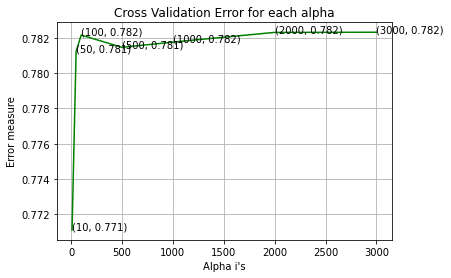

In [ ]:
%matplotlib inline
from sklearn.ensemble import RandomForestClassifier

alpha=[10,50,100,500,1000,2000,3000]
cv_auc_array=[]
for i in alpha:
    r_cfl=RandomForestClassifier(n_estimators=i,random_state=42,n_jobs=-1)
    r_cfl.fit(X_trainsem,y_train)
    sig_clf = CalibratedClassifierCV(r_cfl, method="sigmoid")
    sig_clf.fit(X_trainsem, y_train)
    predict_y = sig_clf.predict_proba(X_cvsem)
    cv_auc_array.append(roc_auc_score(y_cv, predict_y[:,1]))
    
for i in range(len(cv_auc_array)):
    print ('AUC for number of estimators = ',alpha[i],'is',cv_auc_array[i])

best_alpha = np.argmax(cv_auc_array)
    
fig, ax = plt.subplots()
ax.plot(alpha, cv_auc_array,c='g')
for i, txt in enumerate(np.round(cv_auc_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_auc_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

In [ ]:
r_cfl=RandomForestClassifier(n_estimators=alpha[best_alpha],random_state=42,n_jobs=-1)
r_cfl.fit(X_trainsem,y_train)
sig_clf = CalibratedClassifierCV(r_cfl, method="sigmoid")
sig_clf.fit(X_trainsem, y_train)
    
predict_y = sig_clf.predict_proba(X_trainsem)
print ('For values of best alpha = ', alpha[best_alpha], "The train AUC is:",roc_auc_score(y_train, predict_y[:,1]))
predict_y = sig_clf.predict_proba(X_cvsem)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation AUC is:",roc_auc_score(y_cv, predict_y[:,1]))
predict_y = sig_clf.predict_proba(X_testsem)
print('For values of best alpha = ', alpha[best_alpha], "The test AUC is:",roc_auc_score(y_test, predict_y[:,1]))

### XGBoost

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
x_cfl=XGBClassifier(tree_method='gpu_hist', max_bin=16)

prams={
    'learning_rate':[0.01,0.03,0.05,0.1,0.15,0.2],
     'n_estimators':[100,200,500,1000,2000],
     'max_depth':[3,5,10],
    'colsample_bytree':[0.1,0.3,0.5,1],
    'subsample':[0.1,0.3,0.5,1]
}
random_cfl=RandomizedSearchCV(x_cfl,param_distributions=prams,verbose=10,n_iter=20, cv=10, scoring='roc_auc')
random_cfl.fit(X_trainsem, y_train)
print (random_cfl.best_params_)

In [ ]:
x_cfl=XGBClassifier(n_estimators=200,max_depth=5,learning_rate=0.1, \
                    colsample_bytree=0.5,subsample=1,tree_method='gpu_hist', max_bin=16)
x_cfl.fit(X_trainsem,y_train,verbose=True)
sig_clf = CalibratedClassifierCV(x_cfl, method="sigmoid")
sig_clf.fit(X_trainsem, y_train)
    
predict_y = sig_clf.predict_proba(X_trainsem)
print ("For values of best alpha = 200 The train AUC is:",roc_auc_score(y_train, predict_y[:, 1]))
predict_y = sig_clf.predict_proba(X_testsem)
print("For values of best alpha = 200 The test AUC is:",roc_auc_score(y_test, predict_y[:, 1]))

In [ ]:
import matplotlib.pyplot as plt; plt.rcdefaults()
feature_importance = x_cfl.get_booster().get_score(importance_type='gain')

objects = feature_importance.keys()
y_pos = np.arange(len(objects))
performance = feature_importance.values()
plt.figure(figsize=(8,20))
plt.barh(y_pos, performance, align='center', alpha=0.5)
plt.yticks(y_pos, objects)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance Graph')
plt.show()